<a href="https://colab.research.google.com/github/A01707199/ICI/blob/main/Codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      Sales  Rating
0  548.9715     9.1
1   80.2200     9.6
2  340.5255     7.4
3  489.0480     8.4
4  634.3785     5.3
2000
Valor de alpha: 1.0343378458769883 Valor de beta: 2.912435546737946
Media normalizada: 0.26207175912668446 Desviación estándar normalizada 0.19772253481612367
Gastos de nómina por mes: 1202356.12
Costo IMSS: 3410076.324
Costo total de electricidad: 20700000.0
Costo total del predial: 120000.0
Costo total del agua: 580439.2
Gastos totales: 27012871.644
5929.582433265515
5672.396563439208
porción de población a convencer 0.037059890207909466


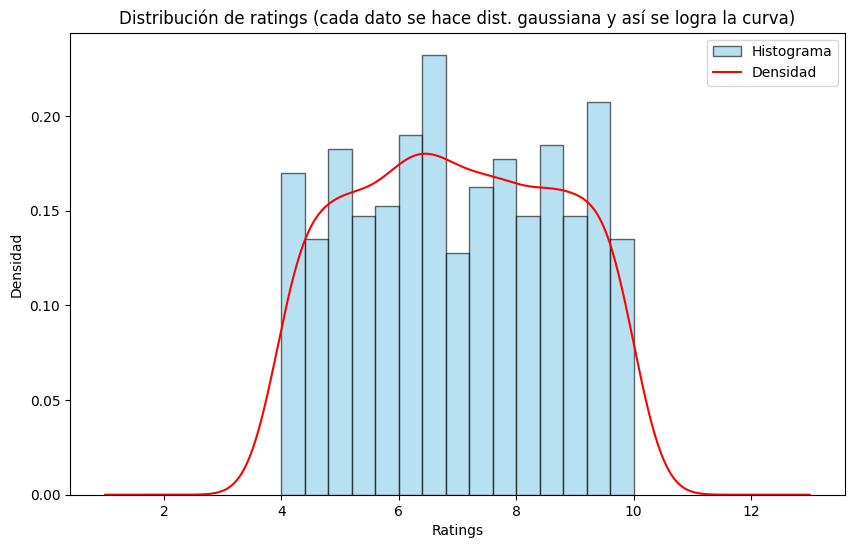

Probabilidad de que el promedio de ratings sea 8.5 o más: 0.0


In [40]:
#bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import norm
#cargar archivo
df = pd.read_csv('SuperMarketData.csv')
print(df.head())
print(df.size)
sales = np.array(df["Sales"]) * 19.88  # Convertir de dólares a pesos. La columna de ventas se hace array.
max_sales = np.max(sales)  # Máximo de las ventas sin normalizar
min_sales = np.min(sales)  # Mínimo de las ventas sin normalizar
sales_norm = 1 / (max_sales - min_sales) * (sales - min_sales)  # Normalizar las ventas con la fórmula
a, b, _, _ = beta.fit(sales)  # Se utiliza el modelo beta
print("Valor de alpha:",a,"Valor de beta:",b)

mu_norm = a / (a + b)  # Media de x normalizada
var_norm = (a * b) / ((a + b) ** 2 * (a + b + 1))  # Varianza de x normalizada
std_norm = np.sqrt(var_norm)  # Desviación estándar de x normalizada
print("Media normalizada:",mu_norm, "Desviación estándar normalizada",std_norm)

mu = (max_sales - min_sales) * mu_norm + min_sales  # Esta media no está normalizada
var = (max_sales - min_sales) ** 2 * var_norm  # Varianza no normalizada
sigma = np.sqrt(var) #Desviación estándar no normalizada

# Salarios de los trabajadores
dias_trab = 24  # dias trabajados al mes (trabajando 6 días a la semana)
fact = 1.15  # Lo que se les va a pagar un 15% más del salario mínimo (aplica para algunos puestos)

sal_cajeros = 258.25  # Salario de los cajeros por dia
num_cajeros = 30  # Número de cajeros
tot_sal_cajeros = sal_cajeros * num_cajeros * dias_trab * fact  # Total del salario de todos, multiplicando salario por hora, días trabajados, num de cajeros y el 1.15 extra

sal_conserjes = 5520  # Salario por mes. No es necesario ya multiplicarlo por los días trabajados
num_conserjes = 20  # Número de conserjes a contratar
tot_sal_conserjes = sal_conserjes * num_conserjes * fact  # Total de gastos en salario de conserjes

tot_sal_gerente = 100000  # Salario mensual del gerente general

sub_gerente = 45000  # Salario mensual de los subgerentes
num_sub_gerente = 4  # Número de subgerentes requeridos
tot_sal_sub_gerente = sub_gerente * num_sub_gerente  # Total de gasto en salario de subgerente

sal_almacenista = 262.13  # Salario por dia del almacenista
almacenista = 40  # Número de almacenistas requeridos en la sucursal
tot_sal_almacenista = sal_almacenista * almacenista * dias_trab * fact  # Total de gasto en salario de personal de almacén

sal_pasillo = 264.65  # Salario por dia  de las personas que trabajan en pasillo
num_pasillo = 40  # Número de personas requerido para pasillo.
tot_sal_pasillo = sal_pasillo * num_pasillo * dias_trab * fact  # Total del salario del personal de pasillo

sal_vigilancia= 6360 #Salario mensual de guardias privados
num_vigilancia=12 #Número de guardias requerido.
tot_sal_vigilancia= sal_vigilancia * num_vigilancia*fact #Total del salario de los guardias.

#suma total de los salarios mensual
nomina_total = (tot_sal_cajeros + tot_sal_conserjes + tot_sal_gerente + tot_sal_sub_gerente + tot_sal_almacenista + tot_sal_pasillo)  # Total de nómina
print("Gastos de nómina por mes:",nomina_total)

#IMSS
pago_por_empleado = 1740.19 * 1.15 #minimo por empleado con salario minimo mensual
numero_empleados = num_cajeros + num_vigilancia + num_pasillo + almacenista + num_conserjes
costo_IMSS = pago_por_empleado * numero_empleados * 12
print("Costo IMSS:", costo_IMSS)

#Gasto de luz mensual
metros2 = 2000 #metros cuadrados
kWhm = 250 #kilowatt por hora anuales
total_kilowatt_hora= kWhm * metros2 * 24 #kilowatt por hora total
tarifaDIT = 1.7250
costo_total_luz = total_kilowatt_hora * tarifaDIT
print("Costo total de electricidad:", costo_total_luz)

#Predial
tasaPredial= 0.012 #Porcentaje del inmueble
costom2= 5000 #costo del m2 en Juriquilla
precio_inmueble= costom2 * metros2
costo_predial= precio_inmueble * tasaPredial
print("Costo total del predial:", costo_predial)

#Agua
consumo_agua=5680
tarifa_m3 = 102.19
total_agua = consumo_agua * tarifa_m3
print("Costo total del agua:", total_agua)

#Seguro
costo_seguro = 1000000 #anual

#Gastos totales
gastos_tot = (costo_total_luz + nomina_total + costo_predial + total_agua + costo_IMSS + costo_seguro )
print("Gastos totales:", gastos_tot)

# La distribución normal de los ingresos
omega = norm.ppf(0.01)
ingreso = gastos_tot + 5400000 #Lo que se espera ganar
a_ = mu ** 2
b_ = -2 * mu * ingreso - omega ** 2 * sigma ** 2
c_ = ingreso ** 2
N1 = (-b_ + np.sqrt(b_ ** 2 - 4 * a_ * c_)) / (2 * a_)
N2 = (-b_ - np.sqrt(b_ ** 2 - 4 * a_ * c_)) / (2 * a_)
print(N1)
print(N2)

if (ingreso / N1 - mu > 0):
    N = N1
else:
    N = N2
porc_pob = N1 / 160000 #160,000 es la población de Juriquilla
print("porción de población a convencer",porc_pob)

#Histograma de distribución de los ratings
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=15, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histograma') #Density nos ayuda a ver el tipo de distribución. Cada dato se modela con una dist. gaussiana
df['Rating'].plot(kind='density', color='red', label='Densidad')
plt.title('Distribución de ratings (cada dato se hace dist. gaussiana y así se logra la curva)')
plt.xlabel('Ratings')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Cálculo de la probabilidad de que los ratings de los clientes sea mayor a 8.5
media_ratings = df['Rating'].mean() # Media de los ratings
std_ratings = df['Rating'].std() # Desviación estándar de los ratings
n = len(df['Rating']) # Tamaño de la muestra (n=1000)
std_error = std_ratings / np.sqrt(n) # Error estándar de la media
prom_calif = 8.5
z_score = (prom_calif - media_ratings) / std_error

prob85 = 1 - norm.cdf(z_score)
print("Probabilidad de que el promedio de ratings sea 8.5 o más:", prob85)
